##**Task-2: To Explore Unsupervised Machine Learning(K- Means Clustering)**

By- Vineet Raj Parashar

### Importing the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

###Loading the Iris Dataset into the notebook


In [ ]:
df = datasets.load_iris()
iris_df = pd.DataFrame(df.data, columns = df.feature_names)

*The first 5 rows*

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Properties and Shape of the dataset



In [ ]:
#full summary of the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
#statistical details of the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#shape of dataset
print(iris_df.shape)

(150, 4)


### Checking for any null values, count the number of null values in each column

In [ ]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
print("total number of null values = ",iris_df.isnull().sum().sum())

total number of null values =  0


### Checking for Outliers

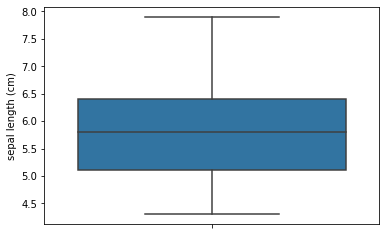

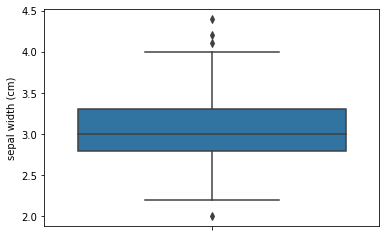

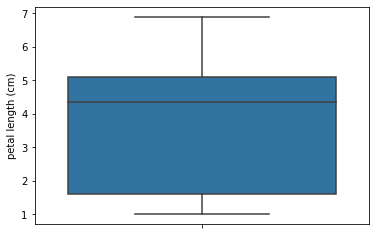

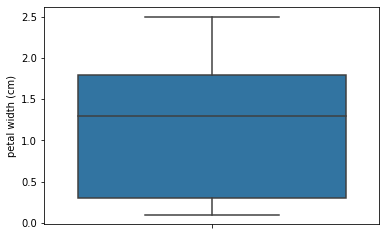

In [ ]:
cols = iris_df.columns
for i in cols:
    sns.boxplot(y=iris_df[i])
    plt.show()

*From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'*

In [ ]:
# To remove outliers from 'sepal width (cm)'
q1 = iris_df['sepal width (cm)'].quantile(0.25)
q3 = iris_df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
iris_df = iris_df[(iris_df['sepal width (cm)'] >= q1-1.5*iqr) & (iris_df['sepal width (cm)'] <= q3+1.5*iqr)]
# To find out the number of rows and column after outlier treatment
iris_df.shape

(146, 4)

In [ ]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [ ]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.123144,0.879362,0.822587
sepal width (cm),-0.123144,1.000000,-0.406141,-0.340602
petal length (cm),0.879362,-0.406141,1.000000,0.961866
petal width (cm),0.822587,-0.340602,0.961866,1.000000


##Finding the optimal number of clusters for K-Means and determining the value of K

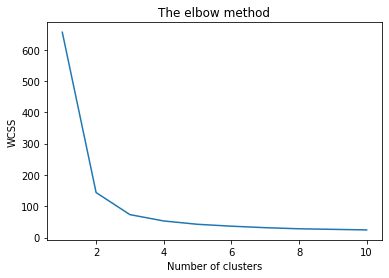

In [ ]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### Creating K-Means Classifier

In [ ]:
# Applying kmeans to the dataset , Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the cluster data

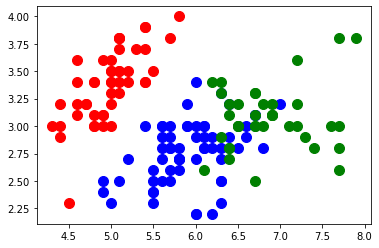

In [ ]:
# Visualising the clusters, Preferably on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

### Plotting the centroids of the clusters

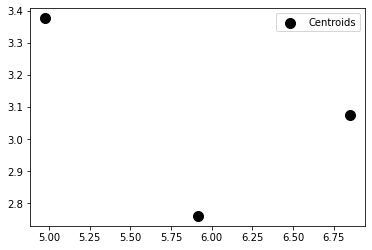

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()


Now Combining both the above graphs together


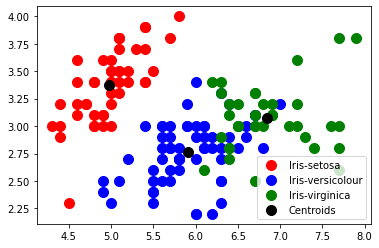

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

### **Thank you**